In [13]:
import pandas as pd
import numpy as np
source_X = pd.read_csv('source_X4.csv')
source_y = pd.read_csv('source_y4.csv')
pred_X = pd.read_csv('pred_X-4.csv')
test = pd.read_csv('test.csv')

In [14]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(source_X,source_y,train_size = 0.8)

In [15]:
from sklearn.linear_model import LogisticRegression#导入算法
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
param_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
pipe = make_pipeline(StandardScaler(),
                    LogisticRegression(n_jobs = -1,random_state = 1,penalty = 'l2'))
gs = GridSearchCV(estimator=pipe,
                 param_grid={
                     'logisticregression__C':param_C,
                     'logisticregression__solver':param_solver
                 })
gs = gs.fit(train_X, train_y)
print("Best model: ", gs.best_params_)
print("Best score: ",gs.best_score_,"(train performance)")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best model:  {'logisticregression__C': 0.1, 'logisticregression__solver': 'newton-cg'}
Best score:  0.7949438202247191 (train performance)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

In [16]:
# use the best model to test data.
clf = gs.best_estimator_
print('Best score: Test perfrmance: %.3f' % clf.score(test_X, test_y))
print('Best score: ', clf.score(test_X, test_y),"(Test perfrmance)")

Best score: Test perfrmance: 0.821
Best score:  0.8212290502793296 (Test perfrmance)


In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_score,test_score = learning_curve(estimator=gs,
                                                   X = train_X,
                                                   y = train_y,
                                                   train_sizes=np.linspace(0.1,1.0,10),
                                                   cv = 5,
                                                   n_jobs=-1)
train_mean = np.mean(train_score,axis = 1)
train_std  = np.std(train_score,axis = 1)
test_mean = np.mean(test_score,axis = 1)
test_std = np.std(test_score,axis = 1)

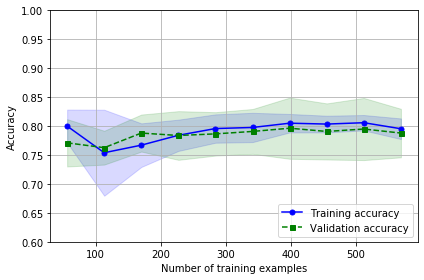

In [18]:
plt.plot(train_sizes,train_mean,
        color = 'blue',marker = 'o',
        markersize = 5,label = 'Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()
#plt.savefig('1.png', dpi=300)
plt.show()
# print("train_std:",train_std)
# print("test_std:",test_std)

In [19]:
pred_Y = gs.predict(pred_X)#使用我们创建的模型，对预测数据集中的生存情况进行预测
pred_Y = pred_Y.astype(int)#因为kaggle要求结果数据类型为int，我们进行数据类型转换
passengerId = test['PassengerId']
#创建结果集
predDf = pd.DataFrame(
    {
        'PassengerId':passengerId,
        'Survived':pred_Y
    }
)
#导出结果
predDf.to_csv('res_LR_04.csv',index = False)